# Necessary Imports and Seed

In [1]:
# Importing necessary libraries

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from PIL import Image
from tqdm.auto import tqdm
import timm

In [2]:
# Fixing the random seed to reproduce results
def set_seed(seed: int = 69) -> None:
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [3]:
set_seed(69)

In [4]:
import pickle
path='/kaggle/input/pickled'

with open(os.path.join(path,'X0.pkl'),'rb') as file:
    X0=pickle.load(file)
with open(os.path.join(path,'X1.pkl'),'rb') as file:
    X1=pickle.load(file)
with open(os.path.join(path,'X2.pkl'),'rb') as file:
    X2=pickle.load(file)
with open(os.path.join(path,'X3.pkl'),'rb') as file:
    X3=pickle.load(file)
with open(os.path.join(path,'X4.pkl'),'rb') as file:
    X4=pickle.load(file)
with open(os.path.join(path,'X5.pkl'),'rb') as file:
    X5=pickle.load(file)
with open(os.path.join(path,'X6.pkl'),'rb') as file:
    X6=pickle.load(file)
with open(os.path.join(path,'X7.pkl'),'rb') as file:
    X7=pickle.load(file)

with open(os.path.join(path,'y0.pkl'),'rb') as file:
    y0=pickle.load(file)
with open(os.path.join(path,'y1.pkl'),'rb') as file:
    y1=pickle.load(file)
with open(os.path.join(path,'y2.pkl'),'rb') as file:
    y2=pickle.load(file)
with open(os.path.join(path,'y3.pkl'),'rb') as file:
    y3=pickle.load(file)
with open(os.path.join(path,'y4.pkl'),'rb') as file:
    y4=pickle.load(file)
with open(os.path.join(path,'y5.pkl'),'rb') as file:
    y5=pickle.load(file)
with open(os.path.join(path,'y6.pkl'),'rb') as file:
    y6=pickle.load(file)
with open(os.path.join(path,'y7.pkl'),'rb') as file:
    y7=pickle.load(file)

In [5]:
#0
#a kind of a function
X0_rand=np.arange(0,4829,1) #sizeof of X_i_
np.random.shuffle(X0_rand)
j=1
X0_random=[]
y0_random=[]
for i in X0_rand:
    j+=1
    X0_random.append(X0[i])
    y0_random.append(y0[i])
    if j>300:
        break
X0_random=np.array(X0_random)
y0_random=np.array(y0_random)

#a kind of a function
#1
X1_rand=np.arange(0,1405,1) #sizeof of X_i_ #
np.random.shuffle(X1_rand)#
j=1
X1_random=[]#
y1_random=[]#
for i in X1_rand:#
    j+=1
    X1_random.append(X1[i])#
    y1_random.append(y1[i])#
    if j>400:
        break
X1_random=np.array(X1_random)#
y1_random=np.array(y1_random)#

#2
#a kind of a function
X2_rand=np.arange(0,285,1) #sizeof of X_i_
np.random.shuffle(X2_rand)
j=1
X2_random=[]
y2_random=[]
for i in X2_rand:
    j+=1
    X2_random.append(X2[i])
    y2_random.append(y2[i])
    if j>500:
        break
X2_random=np.array(X2_random)
y2_random=np.array(y2_random)


#3
#a kind of a function
X3_rand=np.arange(0,443,1) #sizeof of X_i_
np.random.shuffle(X3_rand)
j=1
X3_random=[]
y3_random=[]
for i in X3_rand:
    j+=1
    X3_random.append(X3[i])
    y3_random.append(y3[i])
    if j>500:
        break
X3_random=np.array(X3_random)
y3_random=np.array(y3_random)


#4
#a kind of a function
X4_rand=np.arange(0,789,1) #sizeof of X_i_
np.random.shuffle(X4_rand)
j=1
X4_random=[]
y4_random=[]
for i in X4_rand:
    j+=1
    X4_random.append(X4[i])
    y4_random.append(y4[i])
    if j>500:
        break
X4_random=np.array(X4_random)
y4_random=np.array(y4_random)

#5
#a kind of a function
X5_rand=np.arange(0,68,1) #sizeof of X_i_
np.random.shuffle(X5_rand)
j=1
X5_random=[]
y5_random=[]
for i in X5_rand:
    j+=1
    X5_random.append(X5[i])
    y5_random.append(y5[i])
    if j>500:
        break
X5_random=np.array(X5_random)
y5_random=np.array(y5_random)


#6
#a kind of a function
X6_rand=np.arange(0,295,1) #sizeof of X_i_
np.random.shuffle(X6_rand)
j=1
X6_random=[]
y6_random=[]
for i in X6_rand:
    j+=1
    X6_random.append(X6[i])
    y6_random.append(y6[i])
    if j>500:
        break
X6_random=np.array(X6_random)
y6_random=np.array(y6_random)



#7
#a kind of a function
X7_rand=np.arange(0,87,1) #sizeof of X_i_
np.random.shuffle(X7_rand)
j=1
X7_random=[]
y7_random=[]
for i in X7_rand:
    j+=1
    X7_random.append(X7[i])
    y7_random.append(y7[i])
    if j>500:
        break
X7_random=np.array(X7_random)
y7_random=np.array(y7_random)




In [6]:
X_train=np.concatenate((X0_random,X1_random,X2_random,X3_random,X4_random,X5_random,X6_random,X7_random),axis=0)
y_train=np.concatenate((y0_random,y1_random,y2_random,y3_random,y4_random,y5_random,y6_random,y7_random),axis=0)


In [7]:
#X,y (dataset)
#a kind of a function
Xtrain_rand=np.arange(0,y_train.shape[0],1) #sizeof of X_i_
np.random.shuffle(Xtrain_rand)
j=1
Xtrain_random=[]
ytrain_random=[]
for i in Xtrain_rand:
    j+=1
    Xtrain_random.append(X_train[i])
    ytrain_random.append(y_train[i])
    
X=np.array(Xtrain_random)
y=np.array(ytrain_random)

In [8]:
X.shape

(2378, 227, 227, 3)

In [10]:
# Reading the labels
train_csv = pd.read_csv('/kaggle/input/ai-of-god-v20/train.csv')
test_csv = pd.read_csv('/kaggle/input/ai-of-god-v20/test.csv')
sample_submission = pd.read_csv('/kaggle/input/ai-of-god-v20/sample_submission.csv')


In [ ]:
sample_submission


In [ ]:
Image.open('/kaggle/input/ai-of-god-v20/train/100.jpg')

Applying basic data augmentations to prepare the input for the model

In [11]:

#apply augmentations
transform = A.Compose(
    [
        A.Resize(256,256),
        A.CenterCrop(224,224),
        A.RandomResizedCrop(224,224,scale=(0.7,1.0),ratio=(0.75,1.33333333333),p=0.5),
        A.augmentations.geometric.rotate.Rotate(limit=90,p=0.5),
        A.Flip(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        #A.Normalize(mean=(np.mean(X,axis=1), 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()  #as timm expects input in CHW format
    ]
)

In [12]:
#import matplotlib.pyplot as plt

Preparing the dataset class

In [13]:
class TrainData(Dataset):
    def __init__(self,X,y,transform=None):
        self.X =X
        self.y=y
        self.n_samples=y.shape[0]
        self.transform = transform
    
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self,idx):
        img = self.X[idx]
        
        if self.transform is not None: 
            img = self.transform(image=img) #converts img to dictionary in some way (no its tensor)
            
        dic = {'image': img['image'],'label':self.y[idx]}
        
        return dic
    def show_img(self,idx):
        #considering matplot imported!
        a=self.X[idx]
        plt.imshow(a)
        plt.show()




Creating an object of the dataset class and splitting the dataset into training and validation datasets. 

In [14]:
class TestData(Dataset):
    def __init__(self,transform=None):
        self.dir = "/kaggle/input/ai-of-god-v20/test/"
        self.transform = transform
        
    def __len__(self):
        return len(os.listdir(self.dir))
    
    def __getitem__(self,idx):
        img = cv2.imread(self.dir+str(idx+1)+'.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            img = self.transform(image=img)
        dic = {'image':img['image']}
        return dic

In [15]:
transform1 = A.Compose(
    [
        A.Resize(256,256),
        A.CenterCrop(224,224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ]
)

In [16]:
# Set the split ratio
dataset = TrainData(X,y,transform=transform)

train_ratio = 0.8
validation_ratio = 0.2

# Calculate the sizes for each set
total_size = len(dataset)
train_size = int(train_ratio * total_size)
validation_size = total_size - train_size

train_data, valid_data = random_split(dataset, [train_size, validation_size])

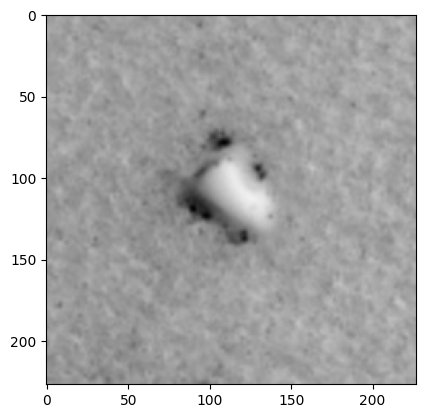

In [17]:
#created afterwards
dataset.show_img(5)    #output different as seed changed

In [18]:
#img1=(dataset[5])['image'] #plt inside getitem


In [19]:
#checking for same output
#a=X[5]
#plt.imshow(a) 
#plt.show()

In [20]:
#train_data[0]

# Defining the model

In [21]:
#tuning_is done here
class CFG:
    model_name = 'densenet121'
    target_size = 8
    batch_size = 32
    epochs = 5
    num_workers = 2 if torch.cuda.is_available() else 4
    lr = 1e-4

 Here we have used DenseNet121 as the sample model.

In [22]:
class CustomNet(nn.Module):
    def __init__(self, model_name=CFG.model_name, pretrained=True):
        super().__init__()
        self.model = timm.create_model(CFG.model_name, pretrained=pretrained,num_classes=CFG.target_size)

    def forward(self, x):
        x = self.model(x)
        return x

# Defining the functions for training, validation, and generating the labels on the test data.

In [23]:
def train_fn(train_loader, model, optimizer, criterion, device):
    model.to(device).train()
    epoch_loss = 0
    count = 0
    correct_predictions =0
    total_predictions =0
    acc=[]
    for i, data in enumerate(tqdm(train_loader,total = len(train_loader))):
        images = data['image'].to(device)
        label = data['label'].to(device)
        
        
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long).to(device) #necessary as labels are np.array so convert them to pytorch tensor for comparision purpose
            
        #optimizer.zero_grad() # as of that one batch doesnt effect other

        output = model(images)
        
        #type(output)
        #print(output)
        #print(output.shape)
        
        
        loss = criterion(output, label)
        
        # Calculate accuracy
        
        _, predicted = torch.max(output, 1) #applied on first axis so (output,1) #return value, index of that value
        correct_predictions += (predicted == label).sum().item()
        total_predictions += label.size(0)


        loss.backward()
        optimizer.step()
        
        #gives accuracy for that batch
        accuracy = correct_predictions / total_predictions
        acc.append(accuracy)

        epoch_loss += loss.item()*images.shape[0]  #image.shape[0] gives batch_size    += is done so  as to accumulate loss of previous batches
        count += images.shape[0]
        #print('epoch_loss: ',epoch_loss,'count: ',count)
        #print(f"Epoch Loss: {epoch_loss / count} | Train_Accuracy: {accuracy * 100:.2f}%")
    acc=np.array(acc)
    acc=np.mean(acc)
    print(f"Epoch Loss: {epoch_loss / count} | Train_Accuracy: {acc * 100:.2f}%")
    return epoch_loss/count

In [24]:
def valid_fn(valid_loader, model, criterion, device):
    model.to(device).eval()
    
    loss = 0
    count = 0
    correct_predictions =0
    total_predictions =0
    acc=[]
    for i, data in enumerate(tqdm(valid_loader,total = len(valid_loader))):
        images = data['image'].to(device)
        label = data['label'].to(device)
        
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(images)
            step_loss = criterion(output, label)
            loss += step_loss.item()*images.shape[0]
            count += images.shape[0]
            
            
        # Calculate accuracy
        
        _, predicted = torch.max(output, 1) #maximum of output in first axis
        correct_predictions += (predicted == label).sum().item()
        total_predictions += label.size(0) #for addition of successive batches
        
        accuracy = correct_predictions / total_predictions
        acc.append(accuracy)
        #print(f"Val_Loss: {loss / count} | val_accuracy: {accuracy * 100:.2f}%")
    
    acc=np.array(acc)
    acc=np.mean(acc)
    print(f"Val_Loss: {loss / count} | val_accuracy: {acc * 100:.2f}%")
    return loss/count

def test_fn(test_loader, model, device):
    model.to(device).eval()
    
    predictions = []
    for i, data in enumerate(tqdm(test_loader,total = len(test_loader))):
        images = data['image'].to(device)
        
        with torch.no_grad():
            output = model(images)
            _, predicted = torch.max(output, 1)
            predictions.append(output.softmax(1).to('cpu').numpy())
    #print(type(predictions))
    #print(predictions)
    #predictions = np.concatenate(preds)
    #predictions=np.array(predictions)
    #predictions = predictions.argmax(1)
    
    return predicted
    #return predictions 


In [25]:
# TEST
def test_fn(test_loader, model, device):
    model.to(device).eval()

    predictions = []
    for i, data in enumerate(tqdm(test_loader,total = len(test_loader))):
        images = data['image'].to(device)

        with torch.no_grad():
            output = model(images)
            # Get the predicted class labels as a 1D array
            predicted_labels = torch.argmax(output, dim=1).to('cpu').numpy()
            predictions.extend(predicted_labels)

    return predictions

# Preparing the dataloaders and defining the loss function and optimizers

In [26]:
train_loader = DataLoader(train_data, batch_size=CFG.batch_size, shuffle=True) #distributes in terms of batches so that iteration is in form of batches
valid_loader = DataLoader(valid_data, batch_size=CFG.batch_size, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [27]:
model = CustomNet(model_name=CFG.model_name, pretrained=True)

model.to(device)
epochs = CFG.epochs
optimizer = torch.optim.SGD(model.parameters(), lr=CFG.lr)
#optimizer = torch.optim.Adam(model.parameters(), lr=CFG.lr)

criterion = nn.CrossEntropyLoss()

# The Training Loop

Here we run the training loop and save the best possible model

In [28]:
best_val_loss = np.inf
trainloss=[]
valloss=[]
for epoch in range(CFG.epochs):
    print('Epoch: ',epoch)
    train_loss = train_fn(train_loader, model, optimizer, criterion, device)
    val_loss = valid_fn(valid_loader, model, criterion, device)
    
    trainloss.append(train_loss) #for graphing purpose later
    valloss.append(val_loss) # for graphing on later

    if val_loss < best_val_loss:
        print('Loss Improved')
        best_val_loss = val_loss
        print(f'Epoch {epoch+1} - Save Val_Loss: {best_val_loss:.4f}')
        torch.save({'model': model.state_dict(), 
                    'optimizer': optimizer.state_dict()},
                    './'+f'{CFG.model_name}_best.pth')


Epoch:  0


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch Loss: 1.6850503436147728 | Train_Accuracy: 33.52%


  0%|          | 0/15 [00:00<?, ?it/s]

Val_Loss: 1.3172386934777267 | val_accuracy: 61.88%
Loss Improved
Epoch 1 - Save Val_Loss: 1.3172
Epoch:  1


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch Loss: 0.918551890506604 | Train_Accuracy: 67.48%


  0%|          | 0/15 [00:00<?, ?it/s]

Val_Loss: 0.7653673281188772 | val_accuracy: 78.44%
Loss Improved
Epoch 2 - Save Val_Loss: 0.7654
Epoch:  2


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch Loss: 0.5582689469294343 | Train_Accuracy: 83.21%


  0%|          | 0/15 [00:00<?, ?it/s]

Val_Loss: 0.471901584322713 | val_accuracy: 87.02%
Loss Improved
Epoch 3 - Save Val_Loss: 0.4719
Epoch:  3


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch Loss: 0.41159727946942287 | Train_Accuracy: 85.46%


  0%|          | 0/15 [00:00<?, ?it/s]

Val_Loss: 0.3632342193056555 | val_accuracy: 87.15%
Loss Improved
Epoch 4 - Save Val_Loss: 0.3632
Epoch:  4


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch Loss: 0.30773884377645017 | Train_Accuracy: 90.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Val_Loss: 0.30641302992315855 | val_accuracy: 91.95%
Loss Improved
Epoch 5 - Save Val_Loss: 0.3064


xpoints = np.arange(0,(y.shape[0])*0.8,1)
ypoints = trainloss
zpoints=valloss
plt.plot(xpoints, ypoints,color='red')
plt.plot(xpoints, zpoints,color='cyan')
plt.show()

In [29]:
torch.save(model,'wid_val_acc91_5epo')

# Generate Predictions

Since we have trained the model, its time to obtain the predictions on the data.

In [30]:
test_dataset = TestData(transform=transform1)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
#model.to(device)
#model.load_state_dict(check_point['model'])
pred = test_fn(test_loader, model, device)

  0%|          | 0/85 [00:00<?, ?it/s]

In [31]:
len(pred)


2694

In [32]:
sub = pd.read_csv('/kaggle/input/ai-of-god-v20/test.csv')

In [33]:
sub['Class'] = pred

In [34]:
sub

,FileName,Class
0,1.jpg,1
1,2.jpg,1
2,3.jpg,1
3,4.jpg,1
4,5.jpg,1
...,...,...
2689,2690.jpg,3
2690,2691.jpg,3
2691,2692.jpg,7
2692,2693.jpg,3


In [35]:
sub.to_csv('submission_vsa_91.csv',index=False)